



예시)
서울특별시 x 
2002,2003,2004.. hue
8.1,9.0,8.5 .. y 

# 전국 실업률 분포 변화

다음 데이터는 2000년부터 2002년까지 지역에 따른 실업률 데이터다.

이 데이터를 토대로 지역별 실업률이 어떻게 변화하고 있는지 확인해라 



In [2]:
from matplotlib import pyplot as plt
from pandas import read_excel, melt
import seaborn as sb
import sys

In [4]:
df = read_excel("https://data.hossam.kr/D01/unemployment_age.xlsx", 
                index_col=[0, 1])
df.head()

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
시도별   연령계층별                                                               ...   
서울특별시 15-29세   8.1   8.4   8.2   8.8   8.9   8.9   8.8   7.4   7.6   8.1  ...   
      30-59세   3.9   3.6   3.0   3.2   3.4   3.6   3.4   3.2   3.0   3.7  ...   
      60세이상    2.9   1.9   2.3   1.9   2.1   2.1   2.6   1.7   1.8   2.3  ...   
부산광역시 15-29세  12.1  10.7   7.6   9.0   9.9   8.8   8.2   8.3   8.1   9.0  ...   
      30-59세   5.5   4.2   2.9   2.9   3.1   3.3   3.2   3.0   2.9   3.5  ...   

              2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
시도별   연령계층별                                                               
서울특별시 15-29세   8.7  10.4   9.3  10.3  10.1  10.1   8.8   9.1   9.0   6.8  
      30-59세   3.0   3.2   3.1   2.9   3.3   3.5   3.2   3.3   3.6   2.4  
      60세이상    2.5   2.8   3.2   2.8   3.6   4.0   4.3   4.7   5.1   3.6  
부산광역시 15-29세   8.8   9.0   9.7   9.9  11.5   9.5   9.1  10.6   7.7   6.8  
      30-59세   3.0   3.0   3.1   2.8   3.2   3.2   2.4   2.9   2.4   2.2  

[5 rows x 23 columns]

## 데이터 전처리

In [5]:
# 인덱스 해제

df2 = df.reset_index()
df2.head()

,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


In [7]:
# melt로 재 정렬
# id_vars = [내가 남기고 싶은거] (id_vars를 제외하고는 다 아래로 들어간다)
# var_name = 필드 이름으로 할 거 (카테고리 역할)
# values_name = 필드 이름으로 할 것 (데이터 역할)

df3 = melt(df2,id_vars=['시도별','연령계층별'],var_name='년도',value_name='실업률')
df3.head(20)

,시도별,연령계층별,년도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5
5,부산광역시,60세이상,2000,5.3
6,대구광역시,15-29세,2000,9.1
7,대구광역시,30-59세,2000,3.7
8,대구광역시,60세이상,2000,0.7
9,인천광역시,15-29세,2000,8.2


## 시각화

In [8]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.unicode_minus'] = False

### 년도에 따른 전국 평균 실업률 변화(전체연령)

In [10]:
tdf = df3.filter(['년도','실업률']).groupby(['년도'],as_index=False).mean()
tdf.head(10)

,년도,실업률
0,2000,4.103922
1,2001,3.762745
2,2002,3.154902
3,2003,3.437255
4,2004,3.582353
5,2005,3.584314
6,2006,3.488235
7,2007,3.343137
8,2008,3.282353
9,2009,3.684314


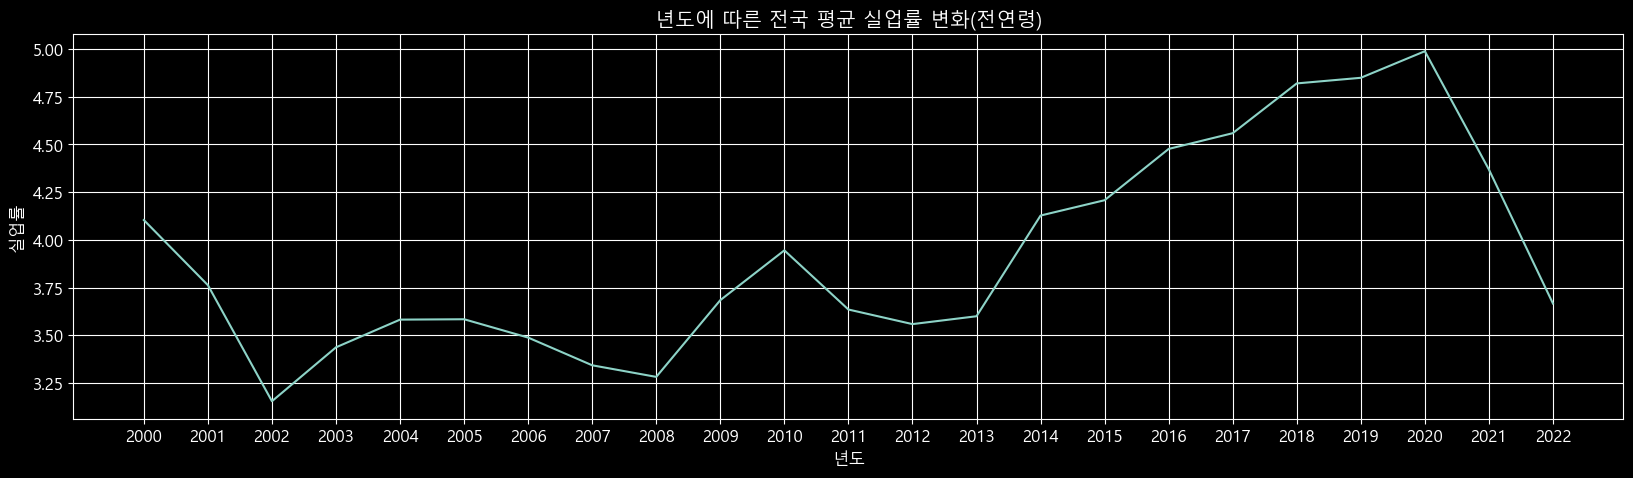

In [11]:
plt.figure()
sb.lineplot(data=tdf,x='년도', y='실업률')
plt.title('년도에 따른 전국 평균 실업률 변화(전연령)')
plt.grid()
plt.show()
plt.close()

In [12]:
tdf = df3.filter(['년도', '연령계층별', '실업률']).groupby(['년도', '연령계층별'], as_index=False).mean()
tdf

,년도,연령계층별,실업률
0,2000,15-29세,7.735294
1,2000,30-59세,3.052941
2,2000,60세이상,1.523529
3,2001,15-29세,7.435294
4,2001,30-59세,2.605882
...,...,...,...
64,2021,30-59세,2.364706
65,2021,60세이상,3.570588
66,2022,15-29세,6.205882
67,2022,30-59세,1.982353


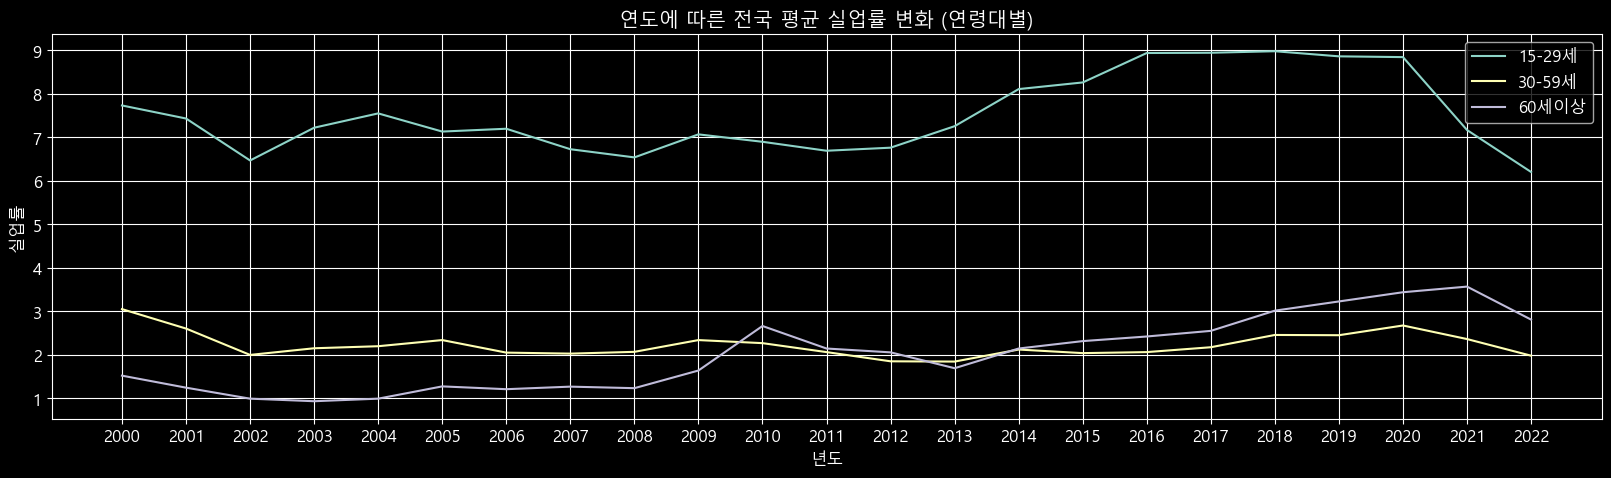

In [14]:
sb.lineplot(data=tdf,x='년도', y='실업률', hue='연령계층별')
plt.title('연도에 따른 전국 평균 실업률 변화 (연령대별)')
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.show()
plt.close()

In [15]:
area = df3['시도별'].unique()
area

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주도'], dtype=object)

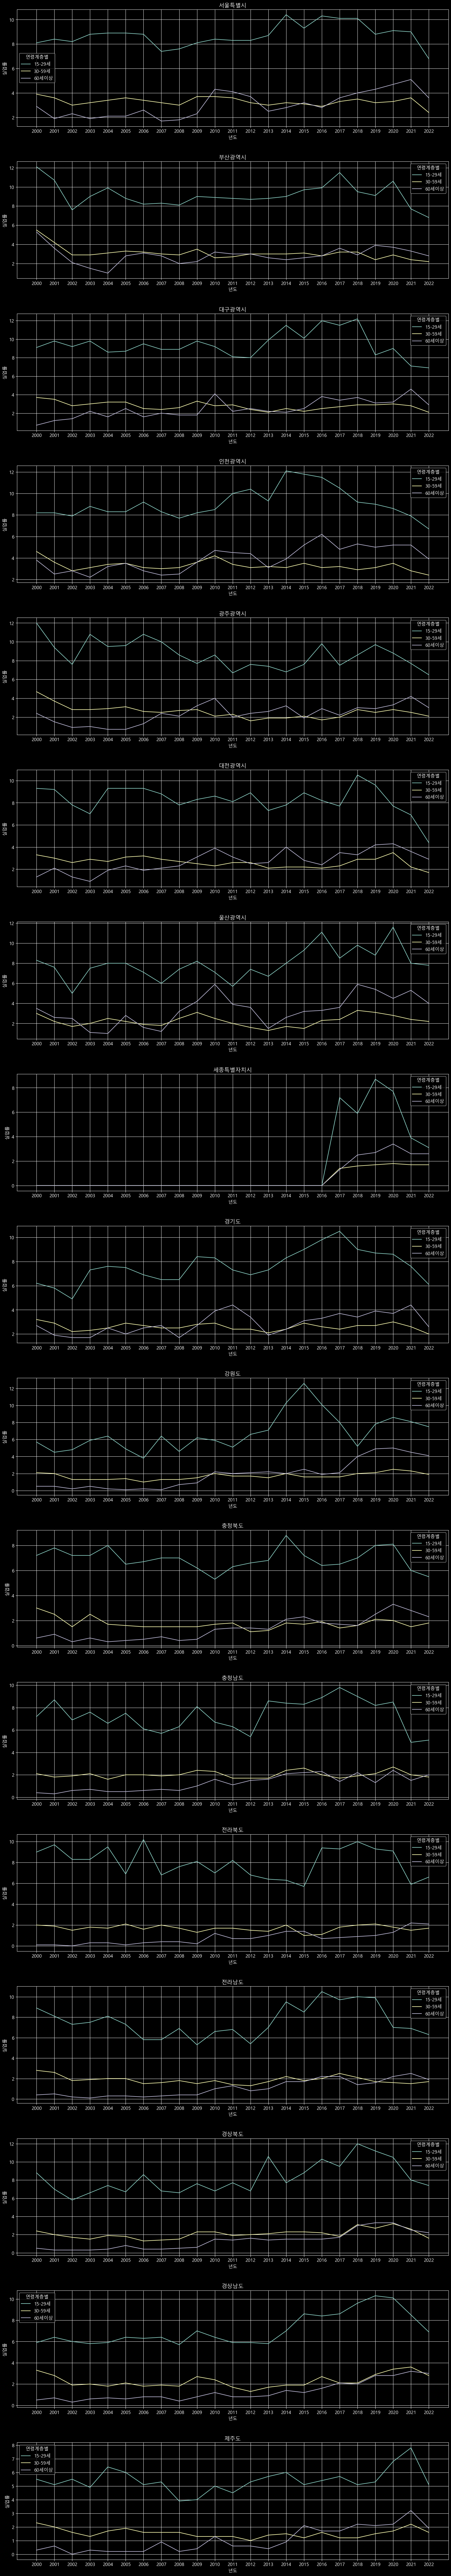

In [20]:
# 지역별 서브플롯
size = len(area)
fig, ax = plt.subplots(size,1,figsize=(20,7*size))
fig.subplots_adjust(hspace=0.3)
for i,v in enumerate(area): 
    tdf = df3.query('시도별==@v')
    sb.lineplot(data=tdf,x='년도',y='실업률',hue='연령계층별',ax=ax[i])
    ax[i].grid()
    ax[i].title.set_text(v)

plt.show()
plt.close()

2열 서브플롯

In [23]:
size = len(area)
rows = int((size/2)+0.5) # 8.5라서 1줄 추가요
rows

9

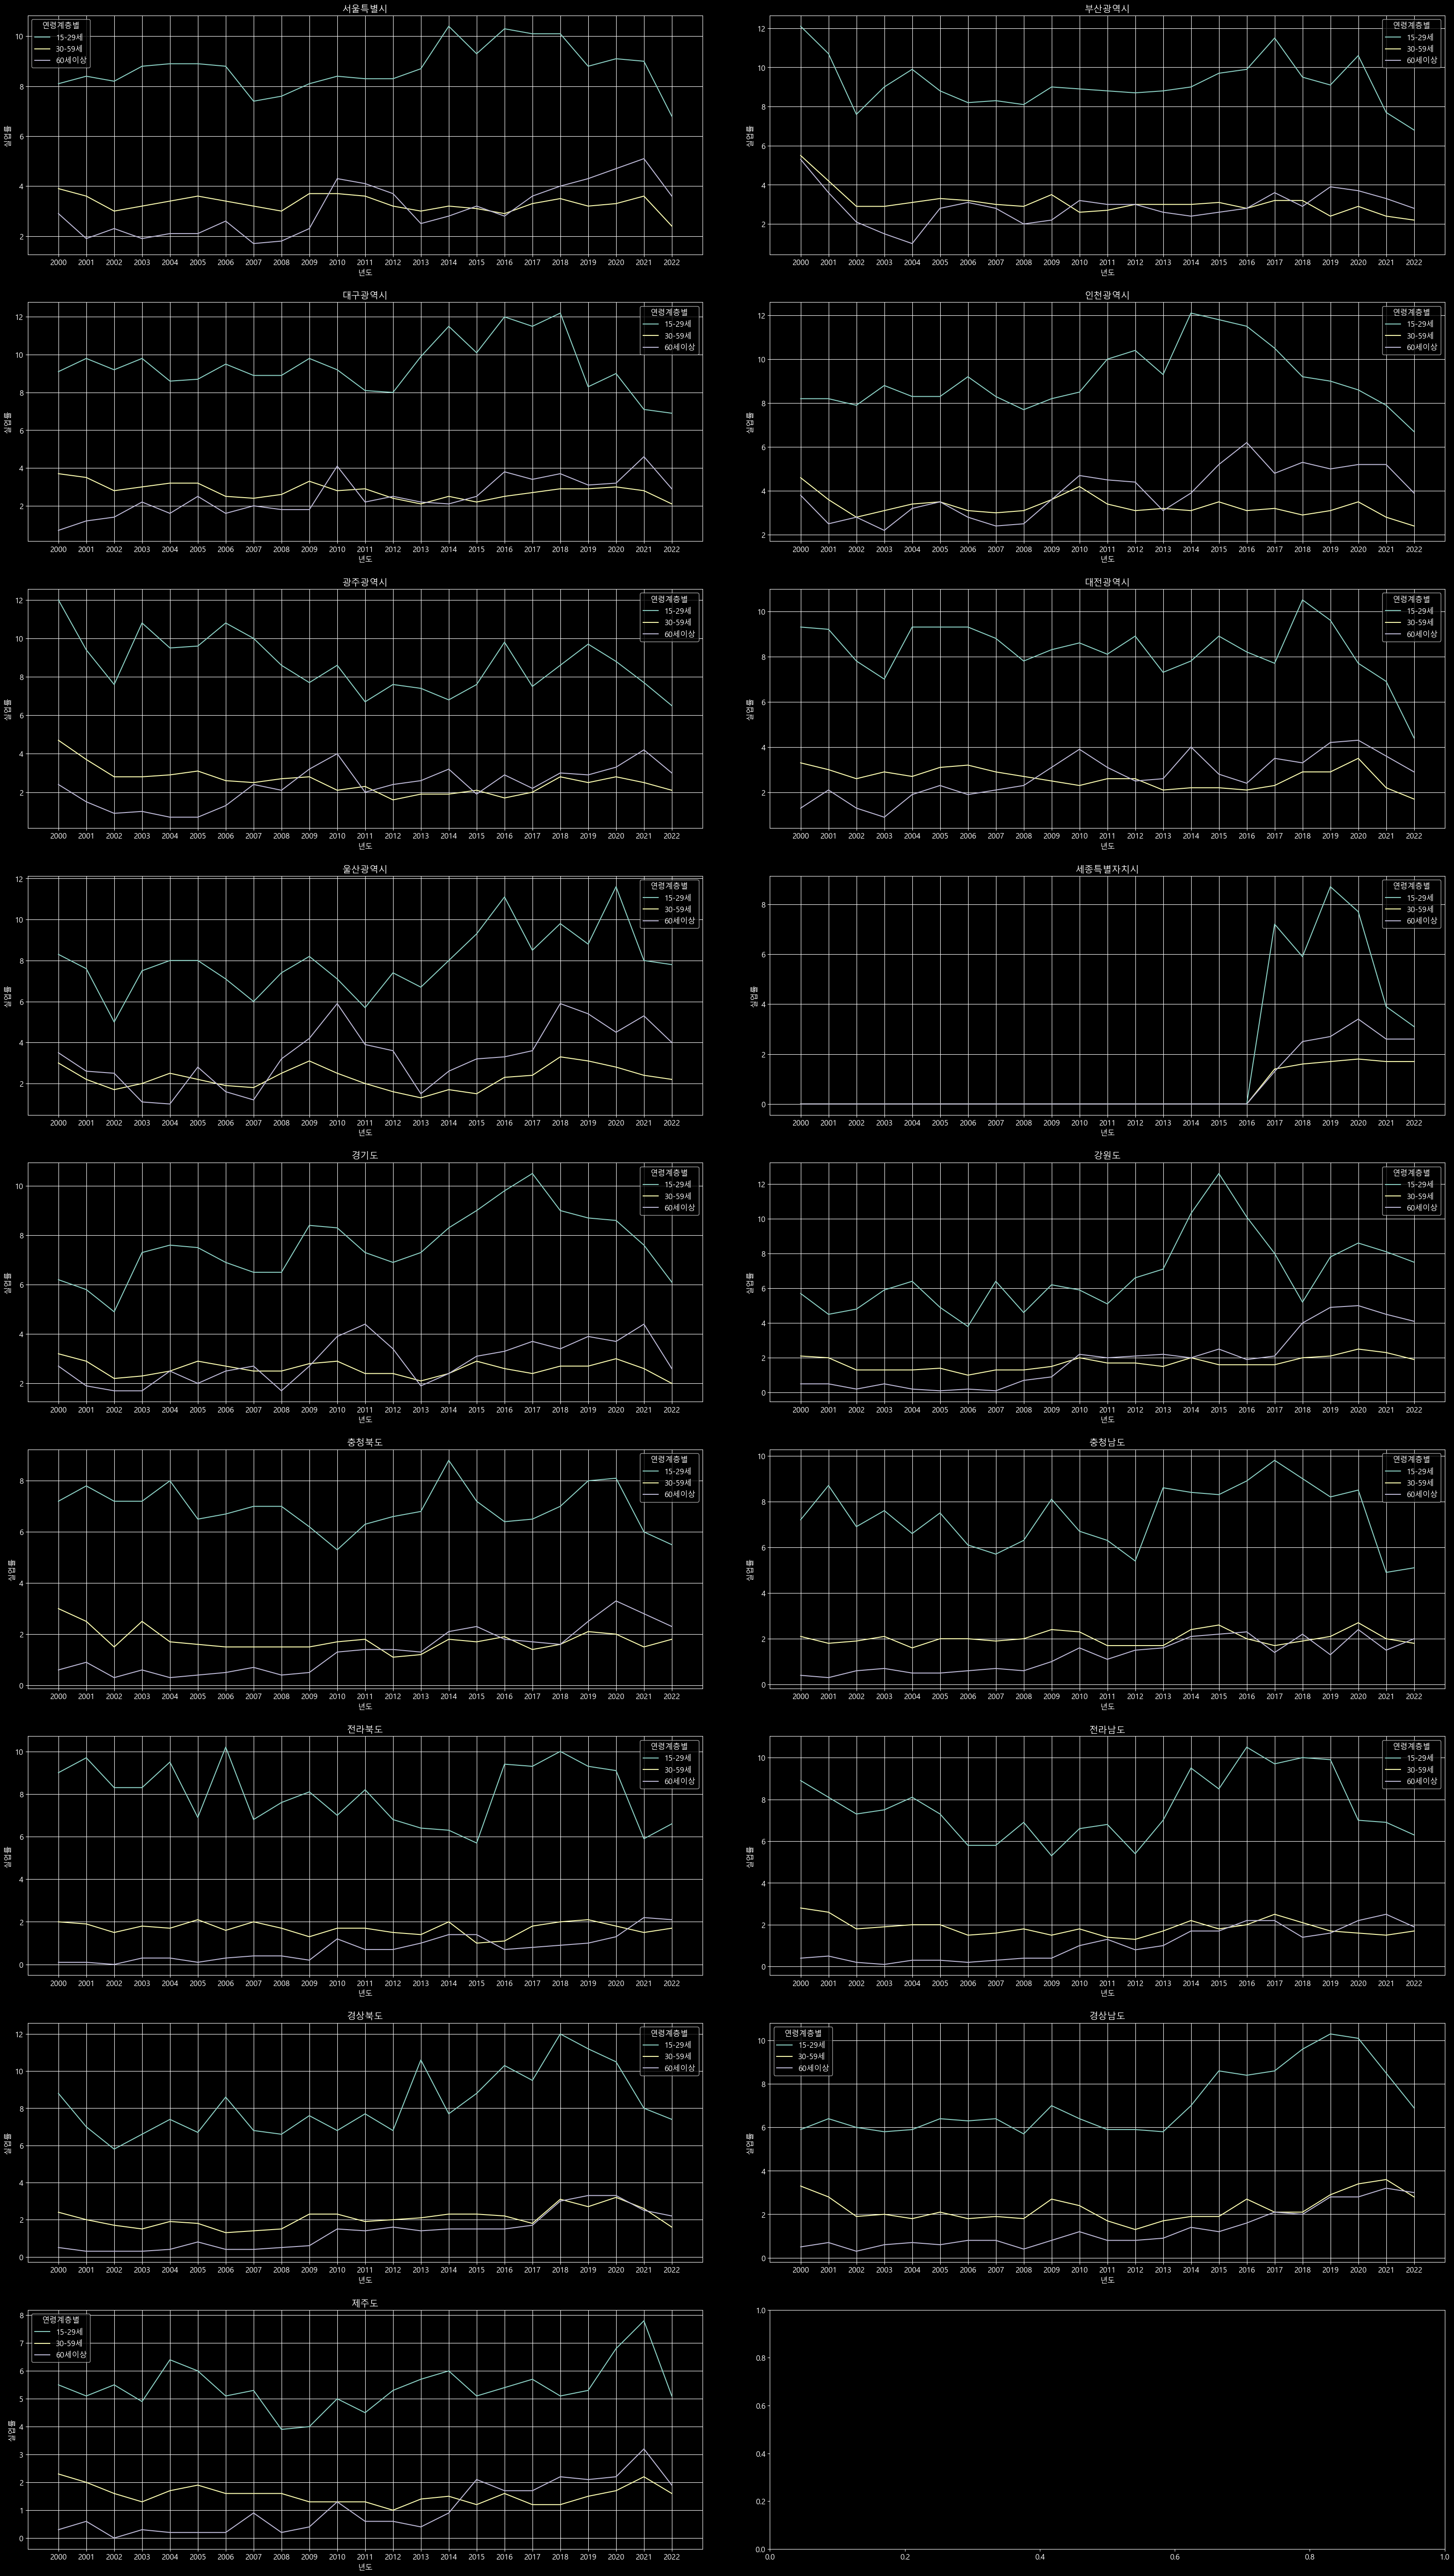

In [24]:
fig, ax = plt.subplots(rows, 2, figsize=(40, 8 * rows))
fig.subplots_adjust(wspace=0.1, hspace=0.2)

x = 0

for i in range(0, rows):
    for j in range(0, 2):
        if x >= size:
            break
        
        key = area[x]
        #print(key)
        x += 1

        tdf = df3.query("시도별 == @key")
        sb.lineplot(data=tdf, x='년도', y='실업률', hue='연령계층별', ax=ax[i][j])
        ax[i][j].grid()
        ax[i][j].title.set_text(key)

plt.show()
plt.close()